In [23]:
!pip3 uninstall pandas-profiling -y

Setting up environment

In [24]:
!pip3 install pandas-profiling


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 3.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 kB 5.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 7.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 11.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 655.7/655.7 kB 13.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.9/423.9 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [25]:
!pip3 install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.1/26.1 MB 14.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 1.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip3 install --upgrade pip


In [30]:
!pip uninstall ydata-profiling visions -y


zsh:1: command not found: pip


In [27]:
!pip3 install ydata-profiling==4.8.3 visions[type_image_path]==0.7.5

zsh:1: no matches found: visions[type_image_path]==0.7.5


In [15]:
!pip3 install --upgrade numba

zsh:1: command not found: pip


In [31]:
import ydata_profiling as pp

ModuleNotFoundError: No module named 'ydata_profiling'

In [35]:
import pandas as pd
import sys
import ydata_profiling as pp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from scipy.stats import norm, skew
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from keras import models, layers
# Tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D
from imblearn.over_sampling import SMOTE

warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'distutils'

Loading Dataset


In [36]:
import requests
import tempfile

# URL of the CSV file on GitHub
url = 'https://raw.githubusercontent.com/BeheraSas/Project--Payment-Risk-Shield/main/Payments%20Dataset.csv'

# Send a GET request to download the file
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Write the response content to a temporary file
    with tempfile.TemporaryFile() as f:
        f.write(response.content)
        f.seek(0)  # reset the file pointer to the beginning of the file

        # Read the CSV file from the temporary file
        data = pd.read_csv(f, parse_dates=['trans_date_trans_time'])
        print(data.head())
else:
    print("Failed to download the file")


/var/folders/9c/cg5xkfcs4_vgd1x5yfd9t9mm0000gn/T/ipykernel_25348/3937079097.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(f, parse_dates=['trans_date_trans_time'])


   Unnamed: 0 trans_date_trans_time        cc_num  \
0           1   2019-01-29 22:05:00  3.550000e+15   
1           2   2019-06-01 15:25:00  3.520000e+15   
2           3   2019-01-13 17:49:00  3.760000e+14   
3           4   2019-03-04 23:48:00  5.140000e+15   
4           5   2019-08-01 15:12:00  3.550000e+15   

                                  merchant      category     amt    first  \
0  fraud_Parisian, Schiller and Altenwerth      misc_net  666.70     Cody   
1          fraud_Hagenes, Kohler and Hoppe   food_dining    1.93  Micheal   
2                        fraud_Kilback LLC   food_dining   23.03   Rachel   
3       fraud_Streich, Dietrich and Barton  shopping_net  994.00   Dakota   
4                          fraud_Kuhic LLC  shopping_net  194.94     Sara   

      last gender                        street  ...      lat      long  \
0    Blake      M                300 Hodge Loaf  ...  29.7396  -95.4460   
1  Walters      M   15315 Vaughn Park Suite 356  ...  47.8342  -90.0

Data cleaning and pre-processing



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             36000 non-null  int64         
 1   trans_date_trans_time  36000 non-null  datetime64[ns]
 2   cc_num                 36000 non-null  float64       
 3   merchant               36000 non-null  object        
 4   category               36000 non-null  object        
 5   amt                    36000 non-null  float64       
 6   first                  36000 non-null  object        
 7   last                   36000 non-null  object        
 8   gender                 36000 non-null  object        
 9   street                 36000 non-null  object        
 10  city                   36000 non-null  object        
 11  state                  36000 non-null  object        
 12  zip                    36000 non-null  int64         
 13  l

In [ ]:
data.nunique()


Unnamed: 0               36000
trans_date_trans_time    22739
cc_num                     320
merchant                   693
category                    14
amt                      17206
first                      348
last                       479
gender                       2
street                     965
city                       879
state                       51
zip                        952
lat                        950
long                       951
city_pop                   865
job                        493
dob                        950
trans_num                36000
unix_time                35650
merch_lat                35960
merch_long               35981
is_fraud                     2
dtype: int64

In [ ]:
print("NULL values:\n", data.isnull().sum())

NULL values:
 Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [ ]:
print("Duplicate Rows:", data.duplicated().sum())

Duplicate Rows: 0


In [ ]:
# Adding Age feature from dob and transaction date

data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['dob'] = pd.to_datetime(data['dob'])

data['age'] = data.apply(lambda row: row['trans_date_trans_time'].year - row['dob'].year - ((row['trans_date_trans_time'].month, row['trans_date_trans_time'].day) < (row['dob'].month, row['dob'].day)), axis=1)


In [ ]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age
0,1,2019-01-29 22:05:00,3.550000e+15,"fraud_Parisian, Schiller and Altenwerth",misc_net,666.70,Cody,Blake,M,300 Hodge Loaf,...,-95.4460,2906700,Community development worker,2062-03-14,5ea472d933561e36dcad710839b9ed6b,1327874723,29.806815,-95.377033,1,-44
1,2,2019-06-01 15:25:00,3.520000e+15,"fraud_Hagenes, Kohler and Hoppe",food_dining,1.93,Micheal,Walters,M,15315 Vaughn Park Suite 356,...,-90.0476,272,Freight forwarder,2001-05-07,fb373b76f05670ce23402ace28650dfb,1325863529,46.835966,-89.251001,0,18
2,3,2019-01-13 17:49:00,3.760000e+14,fraud_Kilback LLC,food_dining,23.03,Rachel,Lowe,F,372 Jeffrey Course,...,-101.1360,1789,Insurance broker,1982-11-02,06f5d997085b59dda6dbf1ae2ed33b71,1326476990,41.938008,-101.775582,0,36
3,4,2019-03-04 23:48:00,5.140000e+15,"fraud_Streich, Dietrich and Barton",shopping_net,994.00,Dakota,Fowler,M,16220 Joseph Point Suite 096,...,-81.8140,13021,Tree surgeon,2001-07-17,db194959b156dee693d5599a2ec54382,1333496912,37.324006,-80.905928,1,17
4,5,2019-08-01 15:12:00,3.550000e+15,fraud_Kuhic LLC,shopping_net,194.94,Sara,Harris,F,597 Jenny Ford Apt. 543,...,-74.4905,6120,Chartered loss adjuster,1976-09-10,69bf1ad18f8c2b366ffe8d7d8a55cf29,1326035535,44.126948,-74.685703,0,42


Dropping unnecessary features


In [37]:
#columns_to_drop = ["Unnamed: 0", "cc_num"]
#columns_to_drop = ["Unnamed: 0","first","last","trans_num","cc_num"]
#data.drop(columns=columns_to_drop, axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             36000 non-null  int64         
 1   trans_date_trans_time  36000 non-null  datetime64[ns]
 2   cc_num                 36000 non-null  float64       
 3   merchant               36000 non-null  object        
 4   category               36000 non-null  object        
 5   amt                    36000 non-null  float64       
 6   first                  36000 non-null  object        
 7   last                   36000 non-null  object        
 8   gender                 36000 non-null  object        
 9   street                 36000 non-null  object        
 10  city                   36000 non-null  object        
 11  state                  36000 non-null  object        
 12  zip                    36000 non-null  int64         
 13  l

Corrlation Matrix between all
features


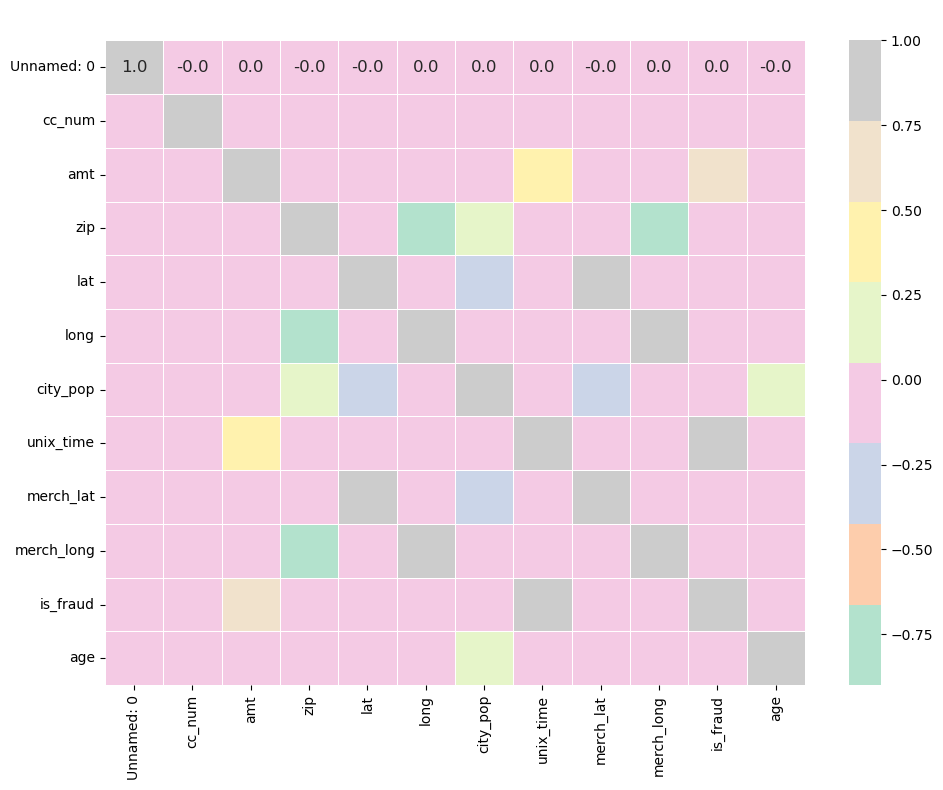

In [ ]:

# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix and round to 1 decimal place
corr = numeric_data.corr().round(1)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(corr, annot=True, cmap='Pastel2', fmt='.1f', linewidths=0.5, annot_kws={"size": 12})
plt.title("Credit Card Fraud - Correlation Heatmap", color="white", size=20)
plt.tight_layout()
plt.show()

In [ ]:
# Lighter colors (pale yellow in the 'Pastel2' colormap) indicate weaker correlations (close to 0).
# Darker colors (darker shades in 'Pastel2') indicate stronger correlations (close to -1 or 1).


## Adding hour feature
Here, first, we simply extract the hour. Then, we encode transactions done in normal hours 0500-2100 as normal (0) and transactions done in abnormal hours 2100-0500 as abnormal (1)

In [ ]:
data['hour'] = data.trans_date_trans_time.dt.hour
data['hourEnc'] = 0
data.loc[data.hour < 5,'hourEnc'] = 1
data.loc[data.hour > 21,'hourEnc'] = 1

## Adding frequencies of transactions
Generating frequencies of transactions done in last 1/7/30 days.

In [ ]:
def last1DayTransactionCount(x):
    temp = pd.Series(x.index, index = x.trans_date_trans_time, name='count_1_day').sort_index()
    count_1_day = temp.rolling('1d').count() - 1
    count_1_day.index = temp.values
    x['count_1_day'] = count_1_day.reindex(x.index)
    return x
def last7DaysTransactionCount(x):
    temp = pd.Series(x.index, index = x.trans_date_trans_time, name='count_7_days').sort_index()
    count_7_days = temp.rolling('7d').count() - 1
    count_7_days.index = temp.values
    x['count_7_days'] = count_7_days.reindex(x.index)
    return x
def last30DaysTransactionCount(x):
    temp = pd.Series(x.index, index = x.trans_date_trans_time, name='count_30_days').sort_index()
    count_30_days = temp.rolling('30d').count() - 1
    count_30_days.index = temp.values
    x['count_30_days'] = count_30_days.reindex(x.index)
    return x

In [ ]:
# Display the first few rows of the DataFrame to verify the columns
print(data.head())


   Unnamed: 0 trans_date_trans_time        cc_num  \
0           1   2019-01-29 22:05:00  3.550000e+15   
1           2   2019-06-01 15:25:00  3.520000e+15   
2           3   2019-01-13 17:49:00  3.760000e+14   
3           4   2019-03-04 23:48:00  5.140000e+15   
4           5   2019-08-01 15:12:00  3.550000e+15   

                                  merchant      category     amt    first  \
0  fraud_Parisian, Schiller and Altenwerth      misc_net  666.70     Cody   
1          fraud_Hagenes, Kohler and Hoppe   food_dining    1.93  Micheal   
2                        fraud_Kilback LLC   food_dining   23.03   Rachel   
3       fraud_Streich, Dietrich and Barton  shopping_net  994.00   Dakota   
4                          fraud_Kuhic LLC  shopping_net  194.94     Sara   

      last gender                        street  ...  \
0    Blake      M                300 Hodge Loaf  ...   
1  Walters      M   15315 Vaughn Park Suite 356  ...   
2     Lowe      F            372 Jeffrey Course  .

In [ ]:
# Ensure 'cc_num' is a column and not part of the index
data = data.reset_index(drop=True)
data = data.groupby('cc_num').apply(last1DayTransactionCount)
data = data.reset_index(drop=True)
data = data.groupby('cc_num').apply(last7DaysTransactionCount)
data = data.reset_index(drop=True)
data = data.groupby('cc_num').apply(last30DaysTransactionCount)
data = data.reset_index(drop=True)
print(data.head())

   Unnamed: 0 trans_date_trans_time        cc_num  \
0        1454   2019-09-01 20:26:00  6.041621e+10   
1        1758   2019-11-01 22:29:00  6.041621e+10   
2        2876   2019-02-01 13:10:00  6.041621e+10   
3        3144   2019-01-17 19:24:00  6.041621e+10   
4        3290   2019-02-03 23:08:00  6.041621e+10   

                            merchant      category     amt first  last gender  \
0       fraud_Cole, Hills and Jewess          home   52.47  Mary  Diaz      F   
1               fraud_Ruecker-Mayert     kids_pets    7.13  Mary  Diaz      F   
2               fraud_Beier and Sons          home   27.18  Mary  Diaz      F   
3  fraud_Nitzsche, Kessler and Wolff  shopping_pos    1.84  Mary  Diaz      F   
4   fraud_Turner, Ziemann and Lehner   food_dining  130.08  Mary  Diaz      F   

             street  ... age hour  hourEnc  count_1_day  count_30_days  \
0  9886 Anita Drive  ...  33   20        0          1.0            1.0   
1  9886 Anita Drive  ...  33   22        1    

In [ ]:
# Add a column to count the frequency of each card
data['card_frequency'] = data.groupby('cc_num')['cc_num'].transform('count')

# Display the frequency of each card
print(data['cc_num'].value_counts())


cc_num
6.010000e+15    1719
2.130000e+14    1376
1.800000e+14    1108
6.760000e+11     774
3.560000e+15     741
                ... 
5.700000e+11       8
6.580000e+15       7
4.410000e+15       7
4.500000e+15       5
5.410000e+15       3
Name: count, Length: 320, dtype: int64


In [ ]:
# Define the function to add card frequency
def add_card_frequency(df):
    # Calculate the frequency of each card and add it as a new column 'card_frequency'
    df['card_frequency'] = df.groupby('cc_num')['cc_num'].transform('count')
    return df

#adding card frequency to the data frame
data = data.reset_index(drop=True)
data = data.groupby('cc_num').apply(add_card_frequency)
data = data.reset_index(drop=True)
print(data.head())


   Unnamed: 0 trans_date_trans_time        cc_num  \
0        1454   2019-09-01 20:26:00  6.041621e+10   
1        1758   2019-11-01 22:29:00  6.041621e+10   
2        2876   2019-02-01 13:10:00  6.041621e+10   
3        3144   2019-01-17 19:24:00  6.041621e+10   
4        3290   2019-02-03 23:08:00  6.041621e+10   

                            merchant      category     amt first  last gender  \
0       fraud_Cole, Hills and Jewess          home   52.47  Mary  Diaz      F   
1               fraud_Ruecker-Mayert     kids_pets    7.13  Mary  Diaz      F   
2               fraud_Beier and Sons          home   27.18  Mary  Diaz      F   
3  fraud_Nitzsche, Kessler and Wolff  shopping_pos    1.84  Mary  Diaz      F   
4   fraud_Turner, Ziemann and Lehner   food_dining  130.08  Mary  Diaz      F   

             street  ...  merch_long is_fraud  age  hour  hourEnc  \
0  9886 Anita Drive  ... -109.005491        0   33    20        0   
1  9886 Anita Drive  ... -109.631996        0   33    22

## Adding times since last transaction - time_diff

In [ ]:
def timeDifferenceforTransactions(x):
    x['time_diff'] = x.trans_date_trans_time - x.trans_date_trans_time.shift()
    return x
data = data.groupby('cc_num').apply(timeDifferenceforTransactions)
data['time_diff'] = data['time_diff'].dt.seconds

Scaling data


<Figure size 1000x600 with 0 Axes>

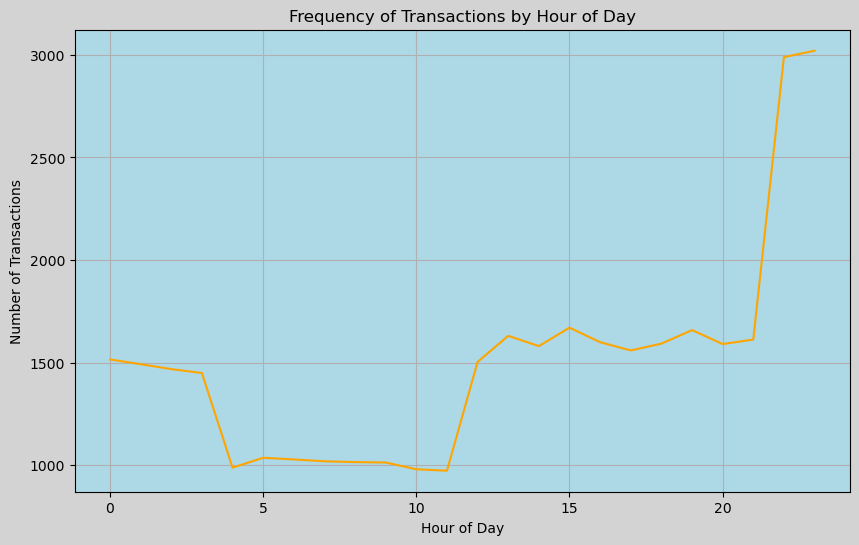

In [ ]:
import matplotlib.pyplot as plt

# Extracting hour of the day from the trans_date_trans_time column
df1['hour_of_day'] = df1['trans_date_trans_time'].dt.hour

# Grouping by hour of day and count the number of transactions
hourly_transactions = df1.groupby('hour_of_day')['cc_num'].count()

# Plotting the frequency of transactions during a time of day
plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6), facecolor='lightgray')
plt.plot(hourly_transactions.index, hourly_transactions.values, color='orange')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.title('Frequency of Transactions by Hour of Day')
plt.grid(True)

# Changing the background color of the graph using axis function
ax = plt.gca()
ax.patch.set_facecolor('lightblue')

plt.show()

# Adding hour_of_day column to the data frame

In [ ]:
def add_hour_of_day(df):
    # Extract the hour of the day from the 'trans_date_trans_time' column and add it as a new column 'hour_of_day'
    df['hour_of_day'] = df['trans_date_trans_time'].dt.hour
    return df
data = add_hour_of_day(data)
print(data.head())

                Unnamed: 0 trans_date_trans_time        cc_num  \
cc_num                                                           
6.041621e+10 0        1454   2019-09-01 20:26:00  6.041621e+10   
             1        1758   2019-11-01 22:29:00  6.041621e+10   
             2        2876   2019-02-01 13:10:00  6.041621e+10   
             3        3144   2019-01-17 19:24:00  6.041621e+10   
             4        3290   2019-02-03 23:08:00  6.041621e+10   

                                         merchant      category     amt first  \
cc_num                                                                          
6.041621e+10 0       fraud_Cole, Hills and Jewess          home   52.47  Mary   
             1               fraud_Ruecker-Mayert     kids_pets    7.13  Mary   
             2               fraud_Beier and Sons          home   27.18  Mary   
             3  fraud_Nitzsche, Kessler and Wolff  shopping_pos    1.84  Mary   
             4   fraud_Turner, Ziemann and Lehner  

In [ ]:
print(data[['hour_of_day']].head())

                hour_of_day
cc_num                     
6.041621e+10 0           20
             1           22
             2           13
             3           19
             4           23


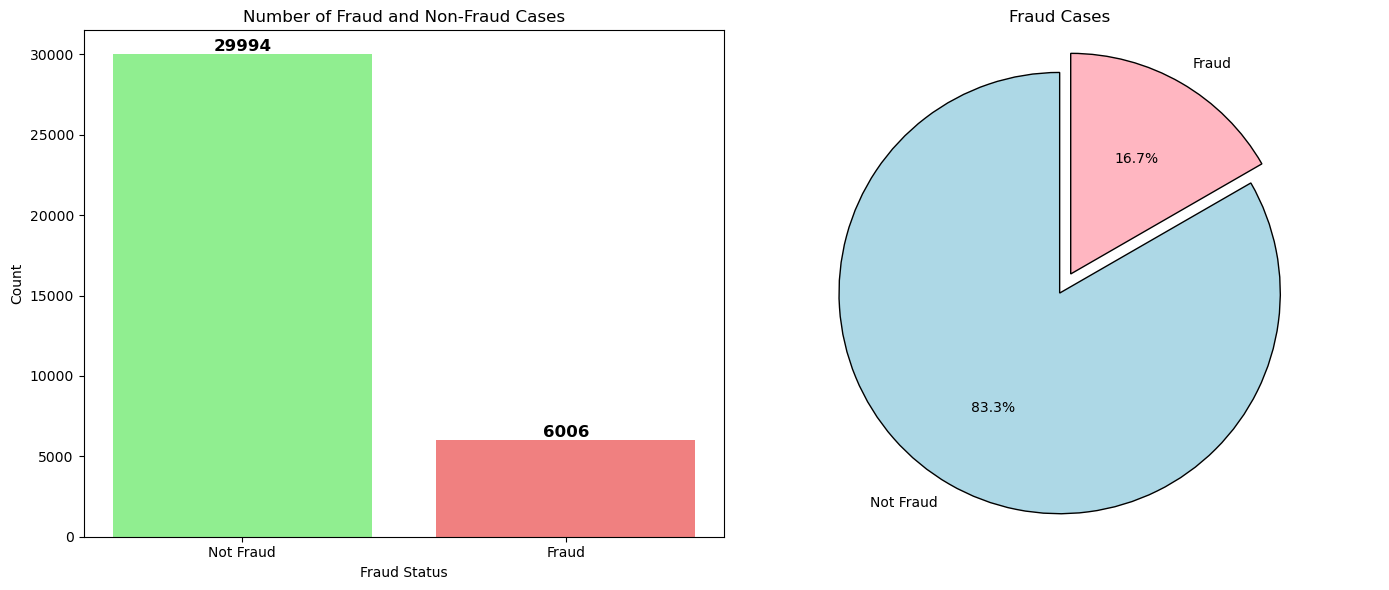

In [ ]:
# Number of Fraud and Not-Fraud Cases
# Count the number of fraud cases
fraud_counts = data["is_fraud"].value_counts()
fraud_labels = fraud_counts.index.tolist()
fraud_values = fraud_counts.tolist()

# Create a figure with one row and two columns for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the bar chart on the first subplot (axes[0])
axes[0].bar(['Not Fraud', 'Fraud'], fraud_values, color=['lightgreen', 'lightcoral'])
for i, v in enumerate(fraud_values):
    axes[0].text(i, v, str(v), ha='center', va='bottom', fontweight='bold', fontsize=12)

axes[0].set_title('Number of Fraud and Non-Fraud Cases')
axes[0].set_xlabel('Fraud Status')
axes[0].set_ylabel('Count')

# Create a pie chart on the second subplot (axes[1])
axes[1].pie(fraud_values, labels=['Not Fraud', 'Fraud'], autopct='%1.1f%%', startangle=90,explode = (0.1,0), colors=['lightblue', 'lightpink'],
            wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
axes[1].set_title('Fraud Cases')
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

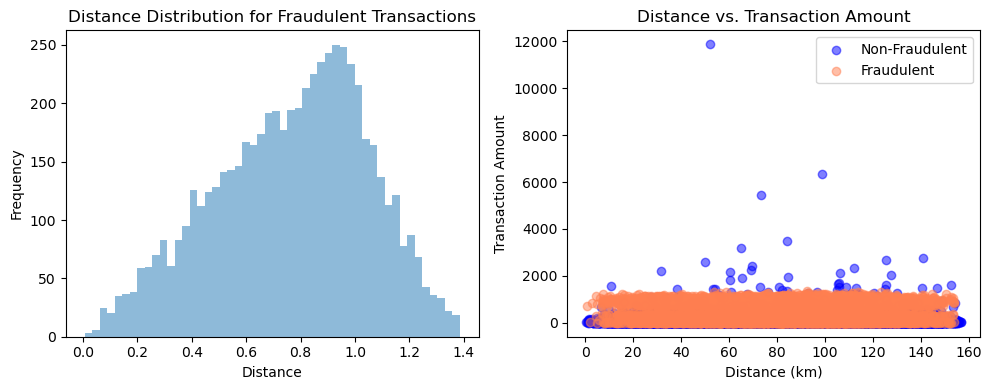

In [ ]:
# Calculating the distance between the customer's location and the merchant's location
data['distance'] = ((data['lat'] - data['merch_lat']) ** 2 + (data['long'] - data['merch_long']) ** 2) ** 0.5

# Filtering fraudulent transactions
fraud_data = data[data['is_fraud'] == 1]
non_fraud_data = data[data['is_fraud'] == 0]

# Creating figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plotting histogram of distances for fraudulent transactions on the first subplot
# calculating the Euclidean distance between the two points in latitude-longitude space
axs[0].hist(fraud_data['distance'], bins=50, alpha=0.5, label='Fraudulent Transactions')
axs[0].set_xlabel('Distance')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Distance Distribution for Fraudulent Transactions')

# Plotting scatter plot of distances vs. transaction amounts for fraudulent and non-fraudulent transactions on the second subplot
axs[1].scatter(non_fraud_data['distance'] * 111, non_fraud_data['amt'], label='Non-Fraudulent', color='blue', alpha=0.5)
axs[1].scatter(fraud_data['distance'] * 111, fraud_data['amt'], label='Fraudulent', color='coral', alpha=0.5)
axs[1].set_xlabel('Distance (km)')
axs[1].set_ylabel('Transaction Amount')
axs[1].set_title('Distance vs. Transaction Amount')
axs[1].legend()

# Layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
print(data.head())

                Unnamed: 0 trans_date_trans_time        cc_num  \
cc_num                                                           
6.041621e+10 0        1454   2019-09-01 20:26:00  6.041621e+10   
             1        1758   2019-11-01 22:29:00  6.041621e+10   
             2        2876   2019-02-01 13:10:00  6.041621e+10   
             3        3144   2019-01-17 19:24:00  6.041621e+10   
             4        3290   2019-02-03 23:08:00  6.041621e+10   

                                         merchant      category     amt first  \
cc_num                                                                          
6.041621e+10 0       fraud_Cole, Hills and Jewess          home   52.47  Mary   
             1               fraud_Ruecker-Mayert     kids_pets    7.13  Mary   
             2               fraud_Beier and Sons          home   27.18  Mary   
             3  fraud_Nitzsche, Kessler and Wolff  shopping_pos    1.84  Mary   
             4   fraud_Turner, Ziemann and Lehner  

In [ ]:
# Verifing the added columns
print(data[['count_1_day', 'count_7_days', 'count_30_days', 'card_frequency', 'hour_of_day', 'distance']].head())

   count_1_day  count_7_days  count_30_days  card_frequency  hour_of_day  \
0          1.0           1.0            1.0              42           20   
1          0.0           0.0            0.0              42           22   
2          3.0           3.0           16.0              42           13   
3          2.0           7.0           11.0              42           19   
4          3.0           7.0           17.0              42           23   

   distance  
0  0.788478  
1  0.839891  
2  0.865386  
3  0.885150  
4  0.136082  


In [ ]:
# Define features (X) and target variable (y)
features = ['count_1_day', 'count_7_days', 'count_30_days', 'card_frequency', 'hour_of_day', 'distance']
X = data[features]
y = data['is_fraud']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Model evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[5818  199]
 [ 402  781]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6017
           1       0.80      0.66      0.72      1183

    accuracy                           0.92      7200
   macro avg       0.87      0.81      0.84      7200
weighted avg       0.91      0.92      0.91      7200


Accuracy Score: 0.9165277777777778


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assume 'target' is the column with the target variable
X = data[['count_1_day', 'count_7_days', 'count_30_days', 'card_frequency', 'hour_of_day', 'distance']]
y = data['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9165277777777778
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6017
           1       0.80      0.66      0.72      1183

    accuracy                           0.92      7200
   macro avg       0.87      0.81      0.84      7200
weighted avg       0.91      0.92      0.91      7200

Confusion Matrix:
[[5818  199]
 [ 402  781]]


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Defining features and target variable
features = ['count_1_day', 'count_7_days', 'count_30_days', 'card_frequency', 
            'hour_of_day', 'distance', 'amt', 'lat', 'long', 'merch_lat', 'merch_long',
            'time_diff', 'age']

# Select categorical columns for encoding
categorical_cols = ['category', 'gender']

# One-hot encoding for categorical variables
X = pd.get_dummies(data[features + categorical_cols], columns=categorical_cols, drop_first=True)
y = data['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the data to DMatrix format required by XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Create an XGBoost model
params = {
    'objective': 'multi:softmax',  # Use 'binary:logistic' for binary classification
    'num_class': 2,
    'max_depth': 6,
    'eta': 0.1,
    'alpha': 10,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42,
    'scale_pos_weight': 3.5
}
xgb_model = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions on the testing set
y_pred = xgb_model.predict(dtest)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9831944444444445
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6017
           1       0.96      0.93      0.95      1183

    accuracy                           0.98      7200
   macro avg       0.98      0.96      0.97      7200
weighted avg       0.98      0.98      0.98      7200

Confusion Matrix:
[[5977   40]
 [  81 1102]]


Decision Tree

In [38]:

X=data.drop('is_fraud', axis=1)
y=data['is_fraud']
label_encoder = LabelEncoder()
for column in X.columns:
    if X[column].dtype == 'object':  # Encode only object (categorical) columns
        X[column + '_encoded'] = label_encoder.fit_transform(X[column])
        X.drop(column, axis=1, inplace=True)

X

# Get the names of categorical features
categorical_features = data.select_dtypes(include='object').columns.tolist()

# Get the names of numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)


# Step 1: Identify and separate datetime columns
datetime_cols = X.select_dtypes(include=[np.datetime64]).columns
numeric_cols = X.select_dtypes(include=[np.number]).columns

# Step 2: Convert datetime columns to numeric (e.g., timestamp)
X_datetime_numeric = X[datetime_cols].apply(lambda col: col.astype(np.int64) // 10**9)

# Combine numeric columns with converted datetime columns
X_numeric = pd.concat([X[numeric_cols], X_datetime_numeric], axis=1)

# Step 3: Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_numeric, y)

X_resampled
X_resampled.info()

# Select the numerical columns
numerical_columns = X_resampled.select_dtypes(include=[float, int]).columns

# Create a scaler object
scaler = StandardScaler()

# Scale numerical columns
X_resampled[numerical_columns] = scaler.fit_transform(X_resampled[numerical_columns])
X_resampled

x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(max_depth=None, random_state=42)
dt_classifier.fit(x_train, y_train)
y_pred = dt_classifier.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


NameError: name 'LabelEncoder' is not defined

In [ ]:
# Count the number of fraud cases
fraud_counts = y_resampled.value_counts()
fraud_labels = fraud_counts.index.tolist()
fraud_values = fraud_counts.tolist()

# Create a figure with one row and two columns for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the bar chart on the first subplot (axes[0])
axes[0].bar(['Not Fraud', 'Fraud'], fraud_values, color=['lightblue', 'lightcoral'])
for i, v in enumerate(fraud_values):
    axes[0].text(i, v, str(v), ha='center', va='bottom', fontweight='bold', fontsize=12)

axes[0].set_title('Number of Fraud and Non-Fraud Cases')
axes[0].set_xlabel('Fraud Status')
axes[0].set_ylabel('Count')

# Create a pie chart on the second subplot (axes[1])
axes[1].pie(fraud_values, labels=['Not Fraud', 'Fraud'], autopct='%1.1f%%', startangle=90,explode = (0.1,0), colors=['lightblue', 'lightcoral'],
            wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
axes[1].set_title('Fraud Cases')
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()